In [ ]:
Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('C:/Users/jyoti/Documents/Engineering Third Year/DSBDAL/datasets/iris.csv')

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [19]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Species', axis =1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

print(f"Transformed training features:\n{x_train[:5]}")

Transformed training features:
[[-1.21030717 -1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-1.37240188 -0.13307079  3.02001693 -1.27728011 -1.04292204]
 [-0.21458252  1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.46502743 -1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-0.74717943 -1.7177306   0.32056046 -1.39196294 -1.30948358]]


In [20]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"Predicted values: {y_pred[:5]}")

Predicted values: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']



Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Confusion Matrix{cm}


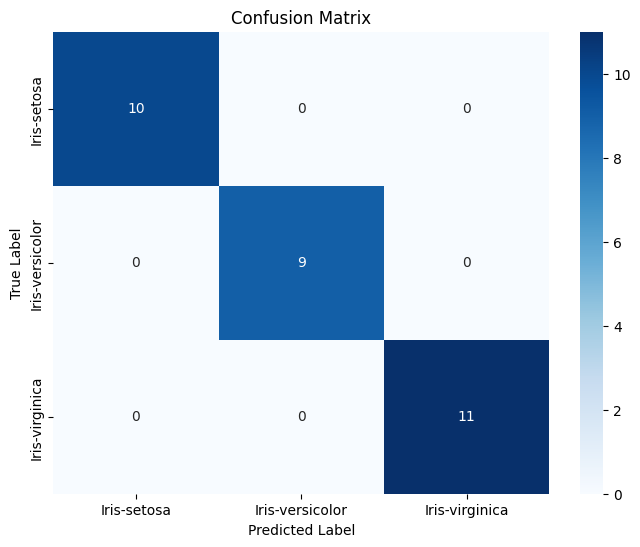

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
True Positive:
11
True Negative:
19
False Positive:
0
False Negative:
0
Accuracy:
1.0
Error Rate:
0.0
Precision:
1.0
Recall:
1.0
f1:
1.0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

classes = model.classes_
print("\nClasses:",classes)
print("\nConfusion Matrix{cm}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

for i, class_name in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:,i].sum() - TP
    FN = cm[i,:].sum() - TP
    TN = cm.sum() - (TP + FP +FN)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
f1 = f1_score(y_test, y_pred, average= 'macro')

print(f"Confusion Matrix:\n{cm}")
print(f"True Positive:\n{TP}")
print(f"True Negative:\n{TN}")
print(f"False Positive:\n{FP}")
print(f"False Negative:\n{FN}")
print(f"Accuracy:\n{accuracy}")
print(f"Error Rate:\n{error_rate}")
print(f"Precision:\n{precision}")
print(f"Recall:\n{recall}")
print(f"f1:\n{f1}")